# Objetivos deste trabalho:
- Se familiarizar com o ambiente Notebook e com Python
- Implementar um perceptron simples, treiná-lo no conjunto de TREINO do CIFAR-10 e avaliá-lo no conjunto de TESTE (alvo: distinguir fotos de animais de meios de transporte)
- Utilizar a função sigmóide e verificar seu efeito no treinamento e na avaliação
- Modificar a metodologia para classificar cada classe individualmente (i.e. treinar 10 perceptrons, um para cada classe). Considerar: dado um exemplo, que passará por cada perceptron, como decidir qual é a classe dele?

In [1]:
%matplotlib inline

import torch
import torchvision
import numpy as np

np.seterr(all='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

0it [00:00, ?it/s]

100%|█████████▉| 170450944/170498071 [01:22<00:00, 2366626.35it/s]

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [0]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

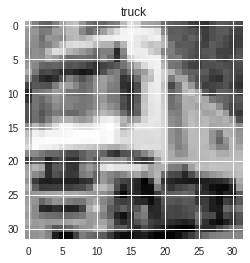

In [6]:
# Mostrar uma imagem

import matplotlib.pyplot as plt
import numpy as np

image_index = 1
label = grayscale_dataset_train[image_index][1]
npimg = grayscale_dataset_train[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()

In [0]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))    

In [8]:
size = len(linear_dataset_train[0][0])
print(size)

1024


# Definindo o perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    o = np.dot(inputs, weights)
    
    return sigmoid(o)

# Treinando o perceptron

In [0]:
def add_bias(dataset):
    return list(map(lambda x: (np.append(x[0], 1), x[1]), dataset))

def print_metrics(metrics):
    acc, sens, spec, f1 = list(map(lambda metric: str('%.2f' % (round(metric, 4)*100)) + "%", metrics))
    return " \t\tacc: " + acc + "\t\tsens: " + sens + "\t\tspec: " + spec + "\t\tf1: " + f1
    
def evaluate(weights,dataset,category=False,training=False):
    confusion_matrix = np.zeros((2,2)) 
    
    for img, label in dataset:
        y = perceptron(img, weights)
        
        if category:
            label = 1 if label == category else 0
        
        if training:
            loss = label - y
            delta = loss * neta * img * y * (1 - y)
            weights = weights + delta
        
        y = round(y)
        confusion_matrix[int(label)][int(y)] += 1
   
    (tn, fn), (fp, tp) = confusion_matrix
    
    accuracy = (tn + tp)/(tn + tp + fn + fp)
    sensitivity = tp/(tp + fn)
    specificity = tn/(tn + fp)
    f1 = (2 * tp)/(2 * tp + fp + fn)
    
    return [accuracy, sensitivity, specificity, f1], weights

In [13]:
# Inicialização
weights = (np.random.rand(1,size) - 0.5)[0]
bias = (np.random.rand(1) - 0.25) 
weights = np.append(weights, bias) 
train_dataset = add_bias(linear_dataset_train)
neta = 0.001
    
# Implemente o treino aqui (para separar as duas classes definidas)
accuracies = []
sensitivities = []
specificities = []
f1s = []
    
for epoch in range(100):
    np.random.shuffle(train_dataset)
    metrics, weights = evaluate(weights, train_dataset, training=True)
    
    print(str(epoch) + print_metrics(metrics))
    accuracies.append(metrics[0])
    sensitivities.append(metrics[1])
    specificities.append(metrics[2])
    f1s.append(metrics[3])

0 		acc: 67.19%		sens: 60.95%		spec: 70.24%		f1: 54.95%
1 		acc: 68.94%		sens: 63.37%		spec: 71.73%		f1: 57.69%
2 		acc: 69.75%		sens: 64.62%		spec: 72.31%		f1: 58.74%
3 		acc: 70.07%		sens: 65.13%		spec: 72.53%		f1: 59.16%
4 		acc: 70.40%		sens: 65.66%		spec: 72.76%		f1: 59.57%
5 		acc: 70.78%		sens: 66.31%		spec: 72.98%		f1: 59.99%
6 		acc: 70.92%		sens: 66.65%		spec: 73.00%		f1: 60.05%
7 		acc: 71.07%		sens: 66.88%		spec: 73.11%		f1: 60.25%
8 		acc: 71.38%		sens: 67.45%		spec: 73.28%		f1: 60.59%
9 		acc: 71.58%		sens: 67.72%		spec: 73.45%		f1: 60.88%
10 		acc: 71.50%		sens: 67.65%		spec: 73.37%		f1: 60.74%
11 		acc: 71.80%		sens: 68.23%		spec: 73.51%		f1: 61.03%
12 		acc: 71.67%		sens: 68.06%		spec: 73.39%		f1: 60.82%
13 		acc: 71.88%		sens: 68.46%		spec: 73.51%		f1: 61.05%
14 		acc: 71.94%		sens: 68.62%		spec: 73.51%		f1: 61.07%
15 		acc: 72.07%		sens: 68.86%		spec: 73.58%		f1: 61.21%
16 		acc: 72.18%		sens: 69.09%		spec: 73.63%		f1: 61.31%
17 		acc: 72.25%		sens: 69.27%		spec: 73.

In [14]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?
test_dataset = add_bias(linear_dataset_test)
metrics, _ = evaluate(weights, test_dataset)

print(print_metrics(metrics))

# Durante o treinamento estocástico do perceptron, foram verificados os índices de acurácia, sensitividade,
# especificidade e f1 para garantir que os pesos estavam sendo atualizados e o número de acertos estava aumentando. 
# Buscou-se chegar a um modelo com alta acurácia, sensitividade e especificidade balanceados que fosse bem generalizado
# (ou seja, acertasse também no conjunto de teste e não apenas no de treino).

# A maior generalização e menor erro foram encontrados no modelo com neta=0.001 e ajuste de pesos utilizando a derivada 
# da sigmóide do produto  escalar o, re-misturando o conjunto a cada época. Ao final, a acurácia de aproximadamente 
# 72% com também bons indicadores de sensitividade e especificidade foi o melhor resultado encontrado. Isto parece
# aceitável se considerarmos que as 10 classes diferentes foram discretizadas em apenas 2, o que dificilmente resultaria
# em um problema totalmente separável linearmente.

 		acc: 72.41%		sens: 75.46%		spec: 71.43%		f1: 57.14%


[]

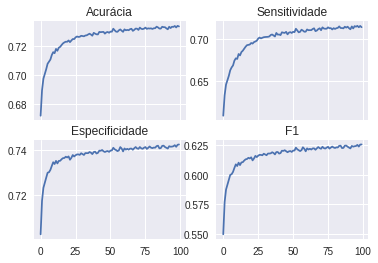

In [15]:
# Caso queiram plotar alguma coisa

import matplotlib.pyplot as plt
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(accuracies)
axarr[0, 0].set_title('Acurácia')
axarr[0, 1].plot(sensitivities)
axarr[0, 1].set_title('Sensitividade')
axarr[1, 0].plot(specificities)
axarr[1, 0].set_title('Especificidade')
axarr[1, 1].plot(f1s)
axarr[1, 1].set_title('F1')

axarr[0, 0].set_xticklabels([])
axarr[0, 1].set_xticklabels([])


# Classificando classes individuais

Implemente aqui a modificação do processo de avaliação e treinamento para poder classificar cada classe individualmente.

- Ideia geral: treinar um perceptron por classe (exemplo positivo = exemplos da classe; exemplos negativos = exemplo de todas outras classes)
- Dado um exemplo qualquer, como decidir qual perceptron está dando a classe correta?

In [0]:
linear_dataset_train = []
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    label = (classes.index(category) + 1)/10
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    label = (classes.index(category) + 1)/10
    linear_dataset_test.append((linear_img,label))
    
size = len(linear_dataset_train[0][0])

# Treinamento

In [27]:
all_weights = (np.random.rand(1,10,size) - 0.5)[0]
bias = (np.random.rand(1) - 0.25) 
all_weights = list(map(lambda weights: np.append(weights, bias), all_weights)) 
train_dataset = add_bias(linear_dataset_train)
neta = 0.002
    
accuracies = np.zeros((10,))
for epoch in range(50):
    print(epoch)
    for i in range(10):
        np.random.shuffle(train_dataset)
        metrics, all_weights[i] = evaluate(all_weights[i], train_dataset, category=(i+1)/10, training=True)
        print(classes[i] + print_metrics(metrics))
        
    print('')

0
plane 		acc: 88.21%		sens: 9.87%		spec: 90.00%		f1: 3.60%
car 		acc: 88.87%		sens: 22.25%		spec: 90.26%		f1: 7.54%
bird 		acc: 89.75%		sens: 7.53%		spec: 89.99%		f1: 0.43%
cat 		acc: 89.72%		sens: 19.66%		spec: 90.05%		f1: 1.76%
deer 		acc: 89.74%		sens: 4.90%		spec: 89.99%		f1: 0.27%
dog 		acc: 89.83%		sens: 10.48%		spec: 90.00%		f1: 0.43%
frog 		acc: 89.78%		sens: 6.40%		spec: 89.99%		f1: 0.31%
horse 		acc: 89.58%		sens: 10.57%		spec: 90.00%		f1: 1.06%
ship 		acc: 89.86%		sens: 6.10%		spec: 89.99%		f1: 0.20%
truck 		acc: 89.34%		sens: 26.01%		spec: 90.22%		f1: 6.32%

1
plane 		acc: 89.97%		sens: 10.53%		spec: 90.00%		f1: 0.08%
car 		acc: 89.64%		sens: 39.09%		spec: 90.49%		f1: 11.18%
bird 		acc: 89.85%		sens: 12.87%		spec: 90.01%		f1: 0.51%
cat 		acc: 89.72%		sens: 23.08%		spec: 90.07%		f1: 2.28%
deer 		acc: 89.93%		sens: 5.41%		spec: 90.00%		f1: 0.08%
dog 		acc: 89.80%		sens: 15.97%		spec: 90.02%		f1: 0.89%
frog 		acc: 89.95%		sens: 12.12%		spec: 90.00%		f1: 0.16%
horse 		acc: 89.

In [0]:
def evaluate_categories(weights,dataset):
    accuracy = 0
    
    for img, label in dataset:
        match = 0.0
        for i in range(10):
          y = perceptron(img, weights[i])
          if y > match:
            match = y
            pred = (i + 1)/10
         
        if pred == label:
          accuracy += 1
         
    return accuracy/len(dataset), weights


# Avaliação

In [32]:
test_dataset = add_bias(linear_dataset_test)
accuracy, _ = evaluate_categories(all_weights, test_dataset)
print("acc: " + str('%.2f' % (round(accuracy, 4)*100)) + "%")

# Cada perceptron aprendeu a identificar se a imagem passada representa ou não a sua respectiva categoria, com 90% de 
# acurácia e uma especificidade muito maior que a sensitividade, pois a divisão das classes neste caso tem uma relação 
# de 1:9. Como o caso negativo é qualquer classe que não seja a indicada na entrada, podemos apenas saber se esta classe
# foi identificada corretamente pelo perceptron ou não, então a acurácia é uma métrica adequada para o problema.

# O resultado de avaliar as classes individuais do conjunto de teste com os 10 perceptrons treinados é uma acurácia que
# se aproxima de 30%, o que demonstra a dificuldade de fazer uma classificação apropriada do conjunto com um modelo
# tão pouco complexo.

acc: 28.71%
